# Extreme Gradient Boosting (XGBoost)

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.

1. [What makes XGBoost so popular?](#What-makes-XGBoost-so-popular?)
  
2. [Boosting](#Boosting)
  
3. [Regression using XGBoost](#Regression-using-XGBoost)

4. [k-fold Cross Validation using XGBoost](#k-fold-Cross-Validation-using-XGBoost)

5. [Feature Importances through XGBoost](#Feature-Importances-through-XGBoost)

### What makes XGBoost so popular?

**`Speed and performance`** : Originally written in C++, it is comparatively faster than other ensemble classifiers.

**`Core algorithm is parallelizable`** : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

**`Consistently outperforms other algorithm methods`** : It has shown better performance on a variety of machine learning benchmark datasets.

**`Wide variety of tuning parameters`** : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

### Boosting

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. 

At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 

Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%.

Let's understand boosting in general with a simple illustration.

![For Example](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528107577/output_1_0_ilvuyr.png)

Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. **Box 1**: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. **Box 2**: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

3. **Box 3**: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

4. **Box 4**: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

That's the basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it.

### Regression using XGBoost

Lets use XGBoost to solve a regression problem. 

The dataset is taken from the UCI Machine Learning Repository and is also present in sklearn's datasets module. It has 14 explanatory variables describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000s.

In [1]:
import warnings
warnings.simplefilter('ignore')

First of all, just like what you do with any other dataset, you are going to import the Boston Housing dataset and store it in a variable called boston.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Boston Dataset

#### Independent Variables

In [5]:
boston.data.shape

(506, 13)

#### Dependent Varables

In [6]:
boston.target.shape

(506,)

Column Names

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.filename

'C:\\Users\\tusha\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

##### Importing the data into Pandas

In [9]:
import pandas as pd

data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### Adding the Dependent Variable `Price` to the dataset

In [11]:
data['Price'] = boston.target

In [12]:
data.shape

(506, 14)

##### Getting info about the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


This dataset has 14 columns (including the target variable PRICE) and 506 rows. Notice that the columns are of float data-type indicating the presence of only continuous features with no missing values in any of the columns.

If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. 

Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally.

##### Without delving into more exploratory analysis and feature engineering, lets focus on applying the algorithm to train the model on this data.

In [14]:
import xgboost as xgb

In [15]:
import pandas as pd
import numpy as np

Splitting dependent and independent variables

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Splitting the Training and the Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

##### Importing XGBoost and creating a regression model

In [18]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

[23:40:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

##### Obtaining Predictions

In [19]:
y_pred = xgb_regressor.predict(X_test)

##### Evaluating Model Perforrmance

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

print("{:<25}: {:>6} ".format("Root Mean Square Error", round(rmse, 2)))
print("{:<25}: {:>5}%".format("R2 Score", round(r2_value * 100, 2)))

Root Mean Square Error   :   3.14 
R2 Score                 : 87.68%


### k-fold Cross Validation using XGBoost

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the `cv()` method. 

Now we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [21]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

We need to create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

In [22]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [23]:

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    nfold=5, 
                    params=params,
                    metrics='rmse', 
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    as_pandas=True)

`cv_results` contains train and test RMSE metrics for each boosting round.

In [24]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.743366,0.154115,21.749432,0.662859
1,19.788201,0.099697,19.851370,0.694807
2,18.008681,0.078304,18.112869,0.661307
3,16.433454,0.106681,16.556349,0.569304
4,14.995523,0.073982,15.157848,0.614243


Extract and print the final boosting round metric.

In [25]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,2.293845,0.139561,3.860085,1.00615


You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 2.29 per 1000$. You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search to reach the optimal set of hyper-parameters.

### Feature Importances through XGBoost

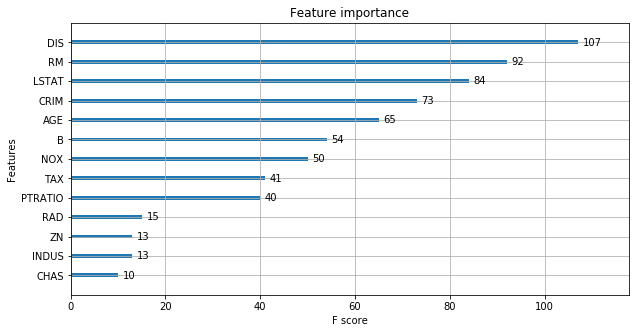

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

xgb.plot_importance(xgb_regressor)
plt.show()

As you can see the feature *DIS* has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection.